In [1]:
from sympy import *
init_printing()

# Spezielle Matrizen

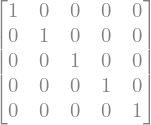

In [2]:
M = eye(5)
M

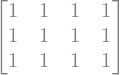

In [3]:
ones(3,4)

In [4]:
zeros(2,1)

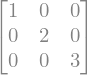

In [5]:
diag(1,2,3)

In [6]:
l = [1,2,3]

In [7]:
diag(l)

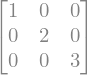

In [8]:
diag(*l)

In [9]:
print(l)
print(*l)   # *l packt die ELemente von l aus

[1, 2, 3]
1 2 3


# Operationen

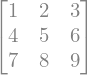

In [10]:
A = Matrix(3, 3, list(range(1,10)))
A

In [11]:
A.det()

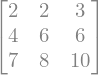

In [12]:
C = A + eye(3)
C

In [13]:
C.det()

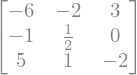

In [14]:
C1 = C**(-1)
C1

In [15]:
C1 == C.inv()

True

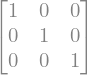

In [16]:
C * C1

# Inspektion

In [17]:
A.shape

In [18]:
v = Matrix([1,2,3])
v

In [19]:
v.shape

Es gibt keine Vektoren, nur $n \times 1$-Matrizen

In [20]:
type(v)

sympy.matrices.dense.MutableDenseMatrix

# Manipulation von Matrizen

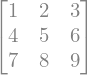

In [21]:
A

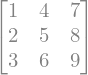

In [22]:
A.T

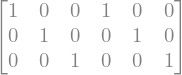

In [23]:
Matrix.hstack(eye(3), eye(3))   
#  eine  class method

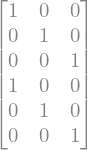

In [24]:
Matrix.vstack(eye(3), eye(3))

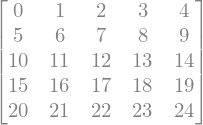

In [25]:
B = Matrix(5, 5, list(range(25)))
B

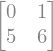

In [26]:
B[:2,:2]

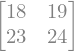

In [27]:
B[3:,3:]

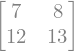

In [28]:
B[1:3,2:4]

In [29]:
B.reshape(1, 25)

In [30]:
flatten(B)

In [31]:
type(B.reshape(1,25))

sympy.matrices.dense.MutableDenseMatrix

In [32]:
type(flatten(B))

list

# Hilbert-Matrizen

als Beispiel für schlecht konditionierte Matrizen

In [33]:
def hilbert(i,j):
    return 1/(1+i+j)

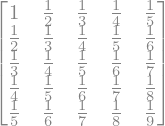

In [34]:
H = Matrix(5, 5, hilbert)
H

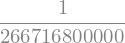

In [35]:
H.det()

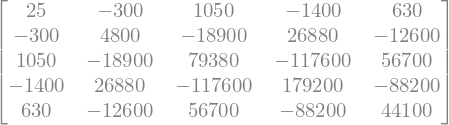

In [36]:
H.inv()

In [64]:
N = 12

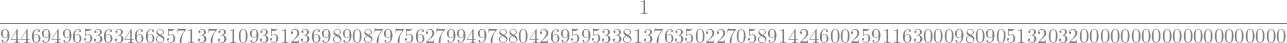

In [65]:
H = Matrix(N, N, hilbert)
H.det()

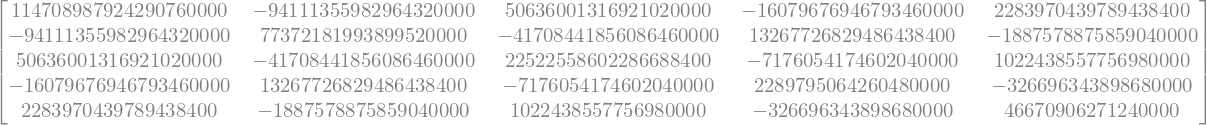

In [66]:
H1 = H**(-1)
H1[N-5:, N-5:]

# Vergleich mit Numerik

In [67]:
import numpy as np

In [68]:
Hn = np.empty((N,N))
for i in range(N):
    for j in range(N):
        Hn[i,j] = 1/(1+i+j)
np.linalg.det(Hn)

In [69]:
H.det().n()

In [70]:
Hn1 = Hn**(1)
Hn1[N-5:, N-5:]

array([[0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ],
       [0.04545455, 0.04347826, 0.04166667, 0.04      , 0.03846154],
       [0.04347826, 0.04166667, 0.04      , 0.03846154, 0.03703704],
       [0.04166667, 0.04      , 0.03846154, 0.03703704, 0.03571429],
       [0.04      , 0.03846154, 0.03703704, 0.03571429, 0.03448276]])

`Hn**(-1)` hat die Kehrwerte aller Matrixeinträge bestimmt

In [71]:
Hn1 = np.linalg.inv(Hn)
Hn1[N-3:, N-3:]

array([[-1.75711426e+15, -2.10577987e+15,  6.72860968e+14],
       [-2.66938968e+15,  2.28873906e+15, -5.30224296e+14],
       [ 8.35785123e+14, -5.56648351e+14,  1.20997097e+14]])

In [72]:
%%timeit
H**(-1)

5.08 s ± 8.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%%timeit
Hn1 = np.linalg.inv(Hn)

5.73 µs ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Eine Python-Bibliothek, die numerische Operationen in beliebige wählbarer Genauigkeit durchführen kann, ist `mpmath`

# Rang einer Matrix

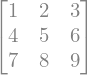

In [47]:
A

In [48]:
A.rank()

In [49]:
x = S('x')
y = S('y')

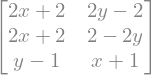

In [50]:
M = Matrix(3, 2, [2*x+2, 2*y-2, 2*x+2, -2*y+2, y-1, x+1])
M

In [51]:
M.rank()

Glauben wir das für alle Wahlen von $x$ und $y$?

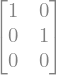

In [52]:
M.rref(pivots=False)  # Zeilenstufenform (engl. reduced row echelon form)

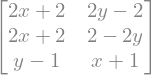

In [53]:
M

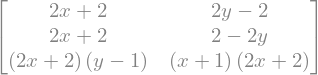

In [54]:
M1 = M.elementary_row_op('n->kn', row=2, k=2*x+2)
M1

Das darf ich aber nur, wenn $2x+2\ne0$.

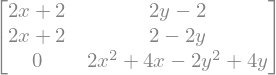

In [55]:
M2 = M1.elementary_row_op('n->n+km', row1=2, row2=0, k=1-y).expand()
M2

Das darf ich immer.

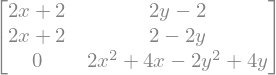

In [56]:
M2

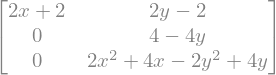

In [57]:
M3 = M2.elementary_row_op('n->n+km', row1=1, row2=0, k=-1)
M3

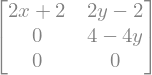

In [58]:
M4 = M3.elementary_row_op('n->n+km', row1=2, row2=1, k=-M3[2,1]/M3[1,1])
M4

Das darf ich nur für $4-4y\ne0$, weil ich durch diesen Wert geteilt habe

Bis jetzt gesehen:

Für $x\ne-1$ und $y\ne1$ ist der Rang gleich $2$.

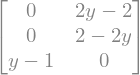

In [59]:
M.subs(x, -1)

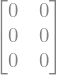

In [60]:
M.subs({x:-1, y:1})

$$
    \text{Rang}(M) =
    \begin{cases}
        0, & x = -1 \wedge y = 1, \\
        2, & \text{in allen anderen Fällen.}
    \end{cases}
$$

`sympy` rechnet im Körper $\mathbb R(x,y)$ der rationalen Polynome